# CIFAR10 classification using HOG features

## Load CIFAR10 dataset

In [1]:
import myutils

raw_data_training, raw_data_testing = myutils.load_CIFAR_dataset(shuffle=False)
# raw_data_training = raw_data_training[:5000]

class_names = myutils.load_CIFAR_classnames()

n_training = len( raw_data_training )
n_testing = len( raw_data_testing )
print('Loaded CIFAR10 database with {} training and {} testing samples'.format(n_training, n_testing))

Loaded CIFAR10 database with 50000 training and 10000 testing samples


# Preprocessing

In [2]:
# Converting to greyscale
def rgb2gray(image):
    import cv2
    return cv2.cvtColor(image,cv2.COLOR_BGR2GRAY)

Xdata_training = [ rgb2gray(raw_data_training[i][0]) for i in range(n_training)]
Xdata_testing  = [ rgb2gray(raw_data_testing[i][0]) for i in range(n_testing)]

Lets look how images looks like

Few examples after preprocessing


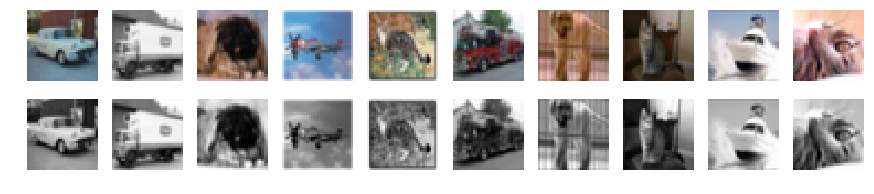

In [3]:
import random
import matplotlib.pyplot as plt
%matplotlib inline

# lets choose some random sample of 10 training images
examples_id = random.sample(range(n_training), 10)
fig, axarr = plt.subplots(2,len(examples_id), figsize=(15,3))
for i in range(len(examples_id)):
    id = examples_id[i]
    axarr[0,i].imshow(raw_data_training[id][0][:,:])
    axarr[0,i].axis('off')
    axarr[1,i].imshow(Xdata_training[id],cmap='gray')
    axarr[1,i].axis('off')
print('Few examples after preprocessing')
plt.show()

# Feature extraction
We use HOG descriptor from [scikit-image](http://scikit-image.org/docs/dev/api/skimage.feature.html#skimage.feature.hog) library.

In [4]:
# Configuring HOG descriptor
# see http://scikit-image.org/docs/dev/api/skimage.feature.html#skimage.feature.hog

# Configuration of HOG descriptor
normalize = True          #  True ==> yields a little bit better score
                          #  
block_norm = 'L2-Hys'     # or 'L1'
orientations = 9          # 
pixels_per_cell = [8, 8]  #  see section 'Additional remarks' for some explanation
cells_per_block = [2, 2]  # 

def extractFeature(img, vis=False):
    from skimage.feature import hog
    return hog(img, orientations, pixels_per_cell, cells_per_block, block_norm, visualise=vis, transform_sqrt=normalize)

## Visualization of HOG histograms

Number of features = 324


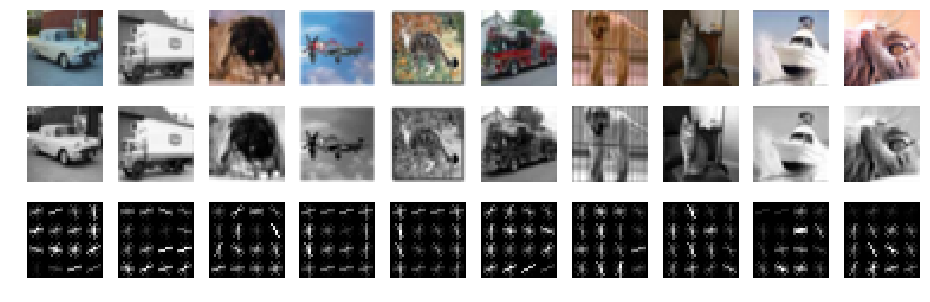

In [5]:
# extracting one sample data
nfeatures = extractFeature(Xdata_training[0], vis=False).size
print('Number of features = {}'.format(nfeatures))

fig, axarr = plt.subplots(3,len(examples_id), figsize=(16,5))
for i in range(len(examples_id)):
    id = examples_id[i]
    axarr[0,i].imshow(raw_data_training[id][0][:,:])
    axarr[0,i].axis('off')
    axarr[1,i].imshow(Xdata_training[id],cmap='gray')
    axarr[1,i].axis('off')
    _, hog_vis = extractFeature(Xdata_training[id], vis=True)
    axarr[2,i].imshow(hog_vis,cmap='gray')
    axarr[2,i].axis('off')
plt.show()

In [6]:
# feature extraction
import numpy as np
X_training = np.array( [ extractFeature(Xdata_training[i], vis=False) for i in range(n_training) ] )
y_training = np.array( [ raw_data_training[i][1] for i in range(n_training) ] )

X_testing = np.array( [ extractFeature(Xdata_testing[i], vis=False) for i in range(n_testing) ] )
y_testing = np.array( [ raw_data_testing[i][1] for i in range(n_testing) ] )

### Short look at the training data

In [7]:
print( 'X_training shape is {}'.format( X_training.shape ) )
print( 'y_training shape is {}'.format( y_training.shape ) )
print( 'X_testing shape is {}'.format( X_testing.shape ) )
print( 'y_testing shape is {}'.format( y_testing.shape ) )

X_training shape is (50000, 324)
y_training shape is (50000,)
X_testing shape is (10000, 324)
y_testing shape is (10000,)


In [8]:
import pandas as pd
print( 'X_training data description')
pd.DataFrame( X_training ).describe()

X_training data description


,0,1,2,3,4,5,6,7,8,9,...,314,315,316,317,318,319,320,321,322,323
count,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,...,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000
mean,0.129458,0.106072,0.114721,0.131569,0.161359,0.117283,0.096029,0.090866,0.095725,0.117669,...,0.092055,0.105863,0.092281,0.099525,0.118193,0.142161,0.103797,0.086137,0.082177,0.085035
std,0.260191,0.176087,0.201889,0.205719,0.268574,0.178080,0.162503,0.152046,0.148762,0.200865,...,0.111476,0.198533,0.122557,0.153237,0.134396,0.240421,0.131419,0.148912,0.111301,0.104691
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.027626,0.019484,0.024582,0.033589,0.047433,0.024329,0.015015,0.011955,0.011667,0.021786,...,0.014060,0.025480,0.021826,0.027016,0.040672,0.053705,0.026726,0.017118,0.014958,0.014871
50%,0.084444,0.065958,0.072605,0.088453,0.117483,0.074988,0.054199,0.049469,0.056918,0.072738,...,0.056095,0.071211,0.060156,0.066941,0.090785,0.116016,0.069890,0.050390,0.048207,0.052963
75%,0.170093,0.145786,0.154047,0.172777,0.204218,0.158513,0.130026,0.124754,0.141140,0.161678,...,0.135231,0.146870,0.129359,0.137813,0.160042,0.186719,0.144154,0.118270,0.115226,0.123913
max,16.067971,9.705519,9.957282,7.209022,16.225216,7.708452,7.708452,5.020748,7.401725,10.042482,...,2.801680,18.070520,7.849949,14.093094,6.322701,24.094100,6.418618,16.958440,8.062340,3.802443


In [9]:
print( 'y_training data description')
pd.DataFrame( y_training ).describe()

y_training data description


,0
count,50000.00000
mean,4.50000
std,2.87231
min,0.00000
25%,2.00000
50%,4.50000
75%,7.00000
max,9.00000


# Classification

We simply use *LinearSVC* from [scikit-learn](http://scikit-learn.org/stable/modules/generated/sklearn.svm.SVC.html#sklearn.svm.SVC) library.

In [10]:
from sklearn.svm import LinearSVC

# parameter C chosen experimentally (see explanation below)
C = 1.0

clf = LinearSVC(C=C)

## Training

In [11]:
# this may take some time
clf.fit(X_training, y_training)

LinearSVC(C=1.0, class_weight=None, dual=True, fit_intercept=True,
     intercept_scaling=1, loss='squared_hinge', max_iter=1000,
     multi_class='ovr', penalty='l2', random_state=None, tol=0.0001,
     verbose=0)

## Testing and score

We obtain **0.4914** score on CIFAR10 testing dataset.

In [12]:
clf.score( X_testing, y_testing )

0.49120000000000003

Short look at the prediction

In [13]:
y_predict = clf.predict( X_testing )

In [14]:
import numpy as np
np.unique( y_predict )

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

Our results for different parameters




TODO: 
* show misclassifications

# Additional remarks

## Tuning C parameter

In [15]:
for C in [ 0.001, 0.01, 0.1, 1.0, 1.2, 1.5, 2.0, 10.0 ]:
    clf = LinearSVC(C=C)
    clf.fit(X_training, y_training)
    print( 'normalize={norm}, C={C}, score={score}'.format(norm=normalize, C=C, score=clf.score( X_testing, y_testing )) )

normalize=True, C=0.001, score=0.4758
normalize=True, C=0.01, score=0.4857
normalize=True, C=0.1, score=0.4904
normalize=True, C=1.0, score=0.4917
normalize=True, C=1.2, score=0.4908
normalize=True, C=1.5, score=0.4908
normalize=True, C=2.0, score=0.4908
normalize=True, C=10.0, score=0.4848


## SVC(kernel=linear) and SVC()

In [16]:
from sklearn.svm import SVC

In [17]:
svc_lin_clf = SVC(kernel='linear', C=1)
svc_lin_clf.fit(X_training, y_training)
svc_lin_clf.score(X_testing, y_testing)

0.51180000000000003

In [18]:
from sklearn.svm import SVC
svc_clf = SVC(C=1)
svc_clf.fit(X_training, y_training)
svc_clf.score(X_testing, y_testing)

0.47549999999999998

# Some results

LinearSVC
<pre>
normalize=False, C=0.001, score=0.281
normalize=False, C=0.01, score=0.3522
normalize=False, C=0.1, score=0.4432
normalize=False, C=1.0, score=0.4765
normalize=False, C=1.2, score=0.4786
normalize=False, C=1.5, score=0.4783
normalize=False, C=2.0, score=0.4802
normalize=False, C=10.0, score=0.4841
normalize=False, C=20.0, score=0.4834
normalize=False, C=50.0, score=0.4833
normalize=False, C=100.0, score=0.4833
normalize=False, C=1000.0, score=0.4667

normalize=True, C=0.001, score=0.4758
normalize=True, C=0.01, score=0.4857
normalize=True, C=0.1, score=0.4903
normalize=True, C=1.0, score=**0.4913**
normalize=True, C=1.2, score=0.4904
normalize=True, C=1.5, score=0.4906
normalize=True, C=2.0, score=0.491
normalize=True, C=10.0, score=0.4902
normalize=True, C=20.0, score=0.4913
normalize=True, C=50.0, score=0.4222
normalize=True, C=100.0, score=0.4166
normalize=True, C=1000.0, score=0.3139

TODO: better presentation
</pre>

SVC(kernel='linear')
<pre>
normalize=True, C=1.0, score=0.5118
</pre>

SVC()
<pre>
normalize=True, C=1.0, score=0.4755
</pre>
